542. 01 Matrix
Attempted  
Medium  
Topics  
Companies  
Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.  

The distance between two adjacent cells is 1.  

 

Example 1:  

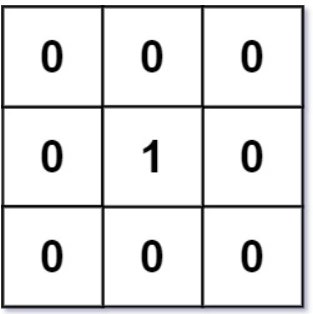
Input: mat = [[0,0,0],[0,1,0],[0,0,0]]  
Output: [[0,0,0],[0,1,0],[0,0,0]]  
Example 2:  

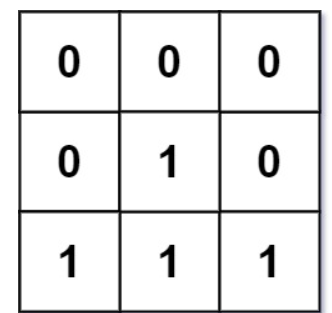
Input: mat = [[0,0,0],[0,1,0],[1,1,1]]  
Output: [[0,0,0],[0,1,0],[1,2,1]]  
 

Constraints:  

m == mat.length  
n == mat[i].length  
1 <= m, n <= 104  
1 <= m * n <= 104  
mat[i][j] is either 0 or 1.  
There is at least one 0 in mat.  

# Using BFS  -> TLE

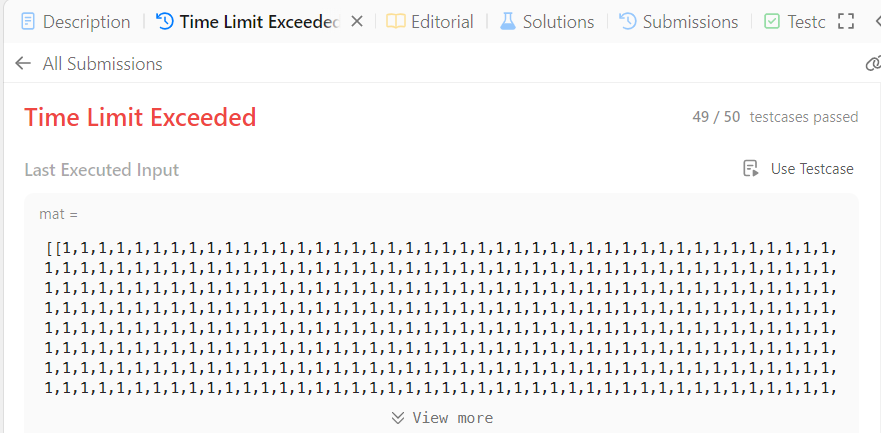

In [1]:
from collections import deque
from typing import List

class Solution:
    # We can use Bfs Traversal to get the distance to nearest 0 (cant use dfs)
    # because bfs goes level by lebel , and in matrix the next level is surrounding 4 nodes 
    # In the queue, we add extra parmeter called d, which will be 0 for initial node 
    # and then d + 1 for subsequent, then as soon as we find popped node as 0 we return its d value

    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:

        def find_distance(mat, i, j):
            directions = [(1, 0), (-1,0), (0,1), (0,-1)]
            visited = {}

            queue = deque([(i,j,0)])
            while queue:
                x, y, d = queue.popleft()
                visited[(x,y)] = True

                # if value at x, y is 0, the return d
                if mat[x][y] == 0:   # Since BFS FIRST CHECKS OUT THE SHORTEST DISTANCE FROM THE CELL, 
                    return d
                for dx, dy in directions:
                    # check validity and if not visited
                    if 0 <= x + dx < len(mat) and 0 <= y + dy < len(mat[0]) and (x + dx, y + dy) not in visited:
                        queue.append((x + dx,y + dy, d + 1 ))

            return -1

        # Traverse through matrix 
        ans = []
        for i in range(len(mat)):
            cols = []
            for j in range(len(mat[0])):
                dist = find_distance(mat, i, j)
                cols.append(dist)
            ans.append(cols)
        return ans

## Optmization of above : where we get the corrdinates of 0 all at once in the queue , mark them as visited 
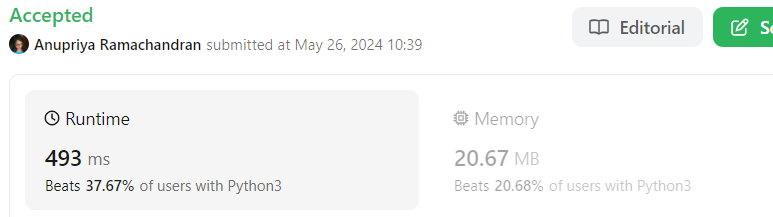

In [ ]:
# Intuition: We can use Bfs Traversal to get the distance to nearest 0 (cant use dfs)
# because bfs goes level by lebel , and in matrix the next level is surrounding 4 nodes 
# In the queue, we add extra parmeter called d, which will be 0 for initial node 
from collections import deque
class Solution:

    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        # Traverse through matrix 
        ans = []
        visit = [[0 for _ in range(len(mat[0]))]for _ in range(len(mat))]
        dist = [[0 for _ in range(len(mat[0]))]for _ in range(len(mat))]
        queue = deque()

        for i in range(len(mat)):
            for j in range(len(mat[0])):
                if mat[i][j] == 0:  # we are getting the positions of zero cells , 
                    queue.append((i, j, 0))   # becoz we want only that to calculate distance of pther cells
                    visit[i][j] = 1         
                else:
                    visit[i][j] = 0


        directions = [(1, 0), (-1,0), (0,1), (0,-1)]
        while queue:
            x, y, d = queue.popleft()
            dist[x][y] = d  # we only need to update for the non-zero element, since for zero elemnts output will be zero only

            for dx, dy in directions:
                # check validity and if not visited
                if 0 <= x + dx < len(mat) and 0 <= y + dy < len(mat[0]) and visit[x + dx][y + dy] == 0:
                    visit[x+dx][y+dy] = 1
                    queue.append((x + dx, y + dy, d + 1 )) 

                    # Logic : If we have not visited the coordinates, 
                    # we consider the distance of popped elemnt which was zero at first iteration as d , 
                    # so we get the distance of first level(not visited) to be at a distance of 1 ie. d + 1 from the popped element,  
                    # and continue to add 1 to d at succeeding levels.

        return dist